In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\kevin\AppData\Local\Temp\ipykernel_37764\377880030.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('.\MWC_ETP_Daily_InfluentQuality_From2014_698890028305835467.csv')
C:\Users\kevin\AppData\Local\Temp\ipykernel_37764\377880030.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('.\MWC_ETP_Daily_InfluentQuality_From2014_698890028305835467.csv')


OSError: [Errno 22] Invalid argument: 'E:\\waterTreatmentProject2\\images\\"boxPlot_Ammonia.png'

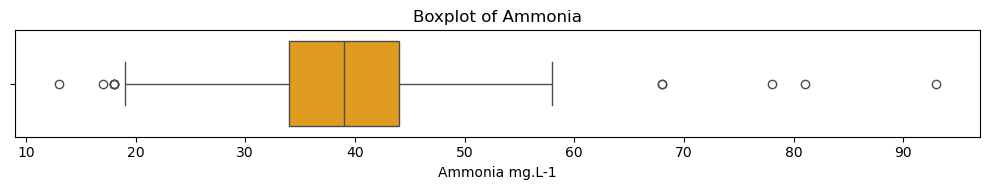

In [4]:
# Read CSV
df = pd.read_csv('.\MWC_ETP_Daily_InfluentQuality_From2014_698890028305835467.csv')

# Count total missing values in each column
df.isnull().sum()


plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Ammonia_mg.L-1'], color='orange')
plt.title("Boxplot of Ammonia")
plt.xlabel("Ammonia mg.L-1")
plt.tight_layout()
plot_path = os.path.join('../images/"boxPlot_Ammonia.png')
plt.savefig(plot_path)
plt.show()

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['BOD_mg.L-1'], color='orange')
plt.title("Boxplot of BOD")
plt.xlabel("BOD mg.L-1")
plt.tight_layout()
plot_path = os.path.join('/content/waterTreatmentProject/images/', "boxPlot_BOD.png")
plt.savefig(plot_path)
plt.show()

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Nitrogentotal_mg.L-1'], color='orange')
plt.title("Boxplot of Total Nitrogen")
plt.xlabel("Total nitrogen mg.L-1")
plt.tight_layout()
plot_path = os.path.join('/content/waterTreatmentProject/images/', "boxPlot_Nitrogen.png")
plt.savefig(plot_path)
plt.show()

In [ ]:
def clean_date(x):
    """
    Try the obvious fixed formats first (fast), then fall back to the
    generic parser for anything stubborn.  Returns pd.NaT if all fail.
    """
    try:
        # US style with seconds & AM/PM
        return pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p")
    except ValueError:
        pass
    try:
        # 24‑h clock, day‑first (common in AU/UK)
        return pd.to_datetime(x, format="%d/%m/%Y %H:%M")
    except ValueError:
        pass
    try:
        # Let dateutil figure out the rest (slower but flexible)
        return parser.parse(x, dayfirst=True)   # day‑first catches 8/03/2014 as 8 Mar
    except (ValueError, TypeError):
        return pd.NaT

df["recorddate"] = df["recorddate"].apply(clean_date)

# Optional: check what couldn’t be parsed
bad = df[df["recorddate"].isna()]
print("Unparsed rows:", len(bad))

# Finally, pick one canonical display format (ISO is safest):
df["recorddate"] = df["recorddate"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.sort_values(by='recorddate')

display(df)


In [ ]:
import matplotlib.dates as mdates


plt.figure(figsize=(7, 5))
plt.plot((df['recorddate']),(df['Ammonia_mg.L-1']), marker='o', linestyle='-',
         color='b', label="Ammonia_mg.L-1")
plt.xlabel("Record date")
plt.ylabel("Ammonia_mg.L-1")
plt.title("Ammonia_mg.L-1 - 2014-2018")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(7, 5))
plt.plot((df['recorddate']),(df['BOD_mg.L-1']), marker='o', linestyle='-',
         color='b', label="BOD_mg.L-1")
plt.xlabel("Record date")
plt.ylabel("BOD_mg.L-1")
plt.title("BOD_mg.L-1 - 2014-2018")
plt.legend()
plt.grid(True)
plt.show()

####Estimation of design flows and pollutant loads.

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Estimation of design flows and pollutant loads.

group_number=10
PE_domestic=340000 #Equivalent population.
Q_domesticpercapita=180 #L/PE/day taken from standards.
PE_commercial=math.ceil(group_number**0.5*9000) #Equivalent population.
Q_commercialpercapita=280 #L/PE/day given in the briefing.
Q_infiltration=1 #L/PE/day

#Current average flow rates
Q_currentavgdomestic=Q_domesticpercapita*PE_domestic/1000
Q_currentavgcommercial=Q_commercialpercapita*PE_commercial/1000
Q_currentavginfiltration=Q_infiltration

#Current minimum flow rates
peak_minimum_factor=0.3 #Taken from the graph given in the briefing
Q_minimumdomestic=Q_currentavgdomestic*peak_minimum_factor
Q_minimumcomercial=Q_currentavgcommercial*peak_minimum_factor
Q_minimuminfiltration=Q_currentavginfiltration*peak_minimum_factor

#Current maximum flow rates
peak_maximum_factor=1.9 #Taken from the graph given in the briefing
Q_maximumdomestic=Q_currentavgdomestic*peak_maximum_factor
Q_maximumcomercial=Q_currentavgcommercial*peak_maximum_factor
Q_maximuminfiltration=Q_currentavginfiltration*peak_maximum_factor

#Equivalent population projection
growth_percentage=1+group_number*0.015
Life_time=20 #Life time decided to our WWTP. Provisional

PE_projected_domestic=math.ceil(PE_domestic*(1+growth_percentage/100)**Life_time)
PE_projected_comercial=math.ceil(PE_commercial*(1+growth_percentage/100)**Life_time)

climate_chage_factor=1.2 #Taken from a projection studies.

#Projected average flow rates (m3/day)
Q_projected_domestic=Q_domesticpercapita*PE_projected_domestic/1000
Q_projected_comercial=Q_commercialpercapita*PE_projected_comercial/1000
Q_projected_infiltration=Q_currentavginfiltration*climate_chage_factor

#Projected minimum flow rates (m3/day)

Q_projected_minimum_domestic=Q_projected_domestic*peak_minimum_factor
Q_projected_minimum_commercial=Q_projected_comercial*peak_minimum_factor
Q_projected_minimuminfiltration=Q_minimuminfiltration*climate_chage_factor

#Projected maximum flow rates (m3/day)
Q_projected_maximum_domestic=Q_projected_domestic*peak_maximum_factor
Q_projected_maximum_commercial=Q_projected_comercial*peak_maximum_factor
Q_projected_maximuminfiltration=Q_maximuminfiltration*climate_chage_factor

#Total Projected flow rates (m3/day)
Q_total_projected_maximum=Q_projected_maximum_domestic+Q_projected_maximum_commercial+Q_projected_maximuminfiltration
Q_total_projected_minimum=Q_projected_minimum_domestic+Q_projected_minimum_commercial+Q_projected_minimuminfiltration
Q_total_projected_average=Q_projected_domestic+Q_projected_comercial+Q_projected_infiltration

#Total current flow rates (m3/day)
Q_total_current_maximum=Q_maximumdomestic+Q_maximumcomercial+Q_maximuminfiltration
Q_total_current_minimum=Q_minimumdomestic+Q_minimumcomercial+Q_minimuminfiltration
Q_total_current_average=Q_currentavgdomestic+Q_currentavgcommercial+Q_currentavginfiltration

print (PE_projected_domestic)
print (PE_projected_comercial)

data_current = {
    'Contribution type': ['Domestic', 'Commercial', 'Infiltration', 'Total'],
    'Minimum flow rate (m3/day)': [Q_minimumdomestic, Q_minimumcomercial, Q_minimuminfiltration, Q_total_current_minimum],
    'Average flow rate (m3/day)': [Q_currentavgdomestic, Q_currentavgcommercial, Q_currentavginfiltration, Q_total_current_average],
    'Maximum flow rate (m3/day)': [Q_maximumdomestic, Q_maximumcomercial, Q_maximuminfiltration, Q_total_current_maximum],
}

df1 = pd.DataFrame(data_current)
display(df1)

data_projected = {
    'Contribution type': ['Domestic ', 'Commercial', 'Infiltration','Total'],
    'Minimum flow rate (m3/day)': [Q_projected_minimum_domestic, Q_projected_minimum_commercial, Q_projected_minimuminfiltration, Q_total_projected_minimum],
    'Average flow rate (m3/day)': [Q_projected_domestic,Q_projected_comercial, Q_projected_infiltration, Q_total_projected_average],
    'Maximum flow rate (m3/day)': [Q_projected_minimum_domestic, Q_projected_minimum_commercial, Q_projected_minimuminfiltration, Q_total_projected_maximum],
}
df2 = pd.DataFrame(data_projected)
display(df2)

####Check with practice - screen design

In [ ]:
#Preliminary treatment design:

#Velocity should be between 0.3 and 1 m/s
#Screen Width is recommended between 0.6 and 1.1 m

velocity_screen=0.7 #m/s, this value the first approximation.
cd=0.84 #dimensionless, this is a value of discharge coefficient for the screen
gravity=9.81 #m/s^2
width_between_bars=0.009 #m, given that it need to trap gross pollutans >10 mm
bar_with=0.004 #m, depends on commercial availability.


velocity_upstream_screen=velocity_screen*width_between_bars/(width_between_bars+bar_with) #m/s
print (velocity_upstream_screen)

head_loss_screen=1/(2*gravity*cd**2)*(velocity_screen**2-velocity_upstream_screen**2)
print (head_loss_screen)

#Design of the screen channel

flow_depth_downstream=0.4 #m during desing peak flow.

flow_depth_upstream=flow_depth_downstream+head_loss_screen

print (flow_depth_upstream)

wet_area=(22291/86400)/velocity_upstream_screen #Flow converted into m^3/s, area in m^2
print (wet_area)

width_channel_screen = (wet_area / flow_depth_upstream)

# Round up to the nearest multiple of 0.05
width_channel_screen_rounded = math.ceil(width_channel_screen / 0.1) * 0.1 #m

print (width_channel_screen_rounded)

if (width_channel_screen_rounded>1.1):
  screen_number=math.ceil(width_channel_screen_rounded/1.1)
  if not 0.3<screen_number<1.1:
    screen_number=math.ceil(screen_number)
  else:
    print('it is too narrow')

print (screen_number)

#It need to comply with the minimum velocity with the average current flow. In this case, we want to find the
#downstream height controlled by a hydraulic structure since this is not provided in the briefing.


velocity_upstream_screen_current_average=0.42 #m/s desired velocity

flow_depth_downstream_current_average=(12444/86400)/(velocity_upstream_screen_current_average*width_channel_screen_rounded)-head_loss_screen #m, it

print (flow_depth_downstream_current_average)

####Design of screens - Preliminary treatment

5.4.3

In [ ]:
#Preliminary treatment design:

#Velocity should be between 0.3 and 1 m/s
#Screen Width is recommended between 0.6 and 1.1 m

velocity_screen=1 #m/s, this value the first approximation.
cd=0.84 #dimensionless, this is a value of discharge coefficient for the screen
gravity=9.81 #m/s^2
width_between_bars=0.01 #m, given that it need to trap gross pollutans >10 mm
bar_with=0.004 #m, depends on commercial availability.


velocity_upstream_screen=velocity_screen*width_between_bars/(width_between_bars+bar_with) #m/s
print (velocity_upstream_screen)

head_loss_screen=1/(2*gravity*cd**2)*(velocity_screen**2-velocity_upstream_screen**2)
print (head_loss_screen)

#Design of the screen channel

flow_depth_downstream=1 #m during desing peak flow.

flow_depth_upstream=flow_depth_downstream+head_loss_screen

print (flow_depth_upstream)

wet_area=(Q_total_projected_maximum/86400)/velocity_upstream_screen #Flow converted into m^3/s, area in m^2
print (wet_area)

width_channel_screen = (wet_area / flow_depth_upstream)

# Round up to the nearest multiple of 0.1
width_channel_screen_rounded = math.ceil(width_channel_screen / 0.1) * 0.1 #m

print (width_channel_screen_rounded)

if (width_channel_screen_rounded>1.1):
  screen_number=math.ceil(width_channel_screen_rounded/1.1)
  if not 0.3<screen_number<1.1:
    screen_number=math.ceil(screen_number)
  else:
    print('it is too narrow')

print (screen_number)

#It need to comply with the minimum velocity with the average current flow. In this case, we want to find the
#downstream depth flow controlled by a hydraulic structure since this is not provided in the briefing.


velocity_upstream_screen_current_average=0.35 #m/s desired velocity

flow_depth_downstream_current_average=(Q_total_current_average/86400)/(velocity_upstream_screen_current_average*width_channel_screen_rounded)-head_loss_screen #m, it

print (flow_depth_downstream_current_average)





#### Equalization basin

9.7.6. Equalization Sustainability and Resource Recovery
Equalization operations have little resource recovery potential. However, they could provide significant sustainable features to a WRRF, as peak demand loadings and their associated larger energy requirements can be avoided when equalization is practiced.

Botero, Lucas, Joel C. Rife, Kendra D. Sveum, and Alex Szerwinski. 2018. “Equalization.” Chap. 9.7 in Design of Water Resource Recovery Facilities. 6th ed., edited by The Water Environment Federation (WEF). McGraw-Hill Education: New York, Chicago, San Francisco, Athens, London, Madrid, Mexico City, Milan, New Delhi, Singapore, Sydney, Toronto. https://www.accessengineeringlibrary.com/content/book/9781260031188/toc-chapter/chapter9/section/section101

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Create data for the table
data = {
    'Time of Day': [f"{i} to {i+1}" for i in range(0, 24)],
    'Qavg (m³/hr)': [Q_total_projected_average/24] * 24,  # Constant average flow
}

# Flow distribution that follows a pattern (low at night, high during day)
# This values are taken from Daily fluctuation of peaking factors graph given in the briefing.
flow_coefficients = [
    0.6, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.7,
    0.8, 0.9, 1, 1, 1.1, 1.2, 1.3, 1.4,
    1.6, 1.7, 1.9, 1.8, 1.6, 1.2, 0.9, 0.7
]
# Calculate actual flow values by multiplying coefficients by the average
flow_values = [coef * Q_total_projected_average/24 for coef in flow_coefficients]
data['Flow distribution Q (m³/hr)'] = flow_values[:24]

# Calculate the difference
data['Difference (Flow-Qavg) (m³/hr)'] = [q - data['Qavg (m³/hr)'][0] for q in data['Flow distribution Q (m³/hr)']]

# Initialize storage calculations
data['Amount to Storage (m³)'] = [0] * 24
data['Amount from Storage (m³)'] = [0] * 24
data['Running Total in Storage (m³)'] = [0] * 24

# Calculate storage values
running_total = 0
for i in range(24):
    diff = data['Difference (Flow-Qavg) (m³/hr)'][i]

    # If flow > avg, we add to storage
    if diff > 0:
        data['Amount to Storage (m³)'][i] = diff
        data['Amount from Storage (m³)'][i] = 0
        running_total += diff
    # If flow < avg, we take from storage
    else:
      if running_total == 0:
        data['Amount to Storage (m³)'][i] = 0
        data['Amount from Storage (m³)'][i] = abs(diff)
        running_total += 0
      else:
        data['Amount to Storage (m³)'][i] = 0
        data['Amount from Storage (m³)'][i] = abs(diff)
        running_total -= abs(diff)

    data['Running Total in Storage (m³)'][i] = running_total

# Create DataFrame
df = pd.DataFrame(data)

# Format the DataFrame for better display
# Format time of day column
df['Time of Day'] = [f"{i:2d} to {i+1:2d}" for i in range(0, 24)]

# Apply formatting to numeric columns to match the table
pd.options.display.float_format = '{:.0f}'.format

# Create styled table
styled_df = df.style.set_table_styles([
    {'selector': 'th', 'props': [('color', 'black'),
                               ('font-weight', 'bold'),
                               ('border', '1px solid #ddd'),
                               ('padding', '5px')]},
    {'selector': 'td', 'props': [('border', '1px solid #ddd'),
                               ('padding', '5px')]},
    {'selector': '', 'props': [('border-collapse', 'collapse'),
                             ('width', '100%'),
                             ('font-size', '14px')]}
])

# Group headers
header_style = {
    'selector': 'th.col_heading',
    'props': [('background-color', '#0a6e3c'),
              ('color', 'white'),
              ('text-align', 'center'),
              ('font-weight', 'bold'),
              ('border', '1px solid black'),
              ('padding', '5px')]
}

# Display the styled table
display(styled_df)

# If you want to save to Excel
df.to_excel("water_flow_table.xlsx", index=False)

# Create a visualization of the data
plt.figure(figsize=(12, 8))

# Plot flow distribution vs average flow
plt.subplot(2, 1, 1)
plt.plot(range(24), df['Flow distribution Q (m³/hr)'], 'b-', label='Flow Distribution')
plt.plot(range(24), df['Qavg (m³/hr)'], 'r--', label='Average Flow')
plt.xlabel('Hour of Day')
plt.ylabel('Flow Rate (m³/hr)')
plt.title('Flow Distribution vs Average Flow')
plt.grid(True)
plt.legend()

# Plot storage metrics
plt.subplot(2, 1, 2)
plt.bar(range(24), df['Amount to Storage (m³)'], color='green', label='Amount to Storage')
plt.bar(range(24), df['Amount from Storage (m³)'], color='red', label='Amount from Storage')
plt.plot(range(24), df['Running Total in Storage (m³)'], 'k-', label='Running Total')
plt.xlabel('Hour of Day')
plt.ylabel('Storage Volume (m³)')
plt.title('Storage Metrics')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#Include adquate safety factors

safety_factor=1.2 #We meed to justify this.
required_volume_equalizer=safety_factor*max(df['Running Total in Storage (m³)'])
rounded_required_volume_equalizer=round(required_volume_equalizer,-3) #m3
print (rounded_required_volume_equalizer)


####Secondary treatment - Check with practice

In [ ]:
BOD_primary_clarifier=180 #mg/L
BOD_required_to_effluent=20 #mg/L
Q1=80000 #m3/d, This needs to be our average flow.
Q2=174000 #m3/d, This needs to be our peak flow.
return_sludge_suspended_solids=8000 #mg/L(XR)
mixed_liquor_suspended_solids=3200 #mg/L(X)
yield_coefficient=0.6 #SS/mg BOD5 (Y)
decay_coefficient=0.06 #/day (Kd)
conversion_rate_constant=0.2 #/day (k)

BOD_removal_efficiency=(BOD_primary_clarifier-BOD_required_to_effluent)/(BOD_primary_clarifier)*100
print (BOD_removal_efficiency)

suspended_volumen_index=10**6/return_sludge_suspended_solids #mL/g ((SVI)
print (suspended_volumen_index)

volumen_settled_sludge=suspended_volumen_index*mixed_liquor_suspended_solids/1000 #v
print (volumen_settled_sludge)

return_sluge_flow=(Q1*volumen_settled_sludge)/(1000-volumen_settled_sludge) #m3/d
print (return_sluge_flow)

return_sludge_ratio=return_sluge_flow/Q1*100
print (return_sludge_ratio)

food_to_microorganism_ratio=0.405 #This value depends on the process, for this case it is a extended aereation. Try to minimize the volumen.

aereation_volumen=(BOD_primary_clarifier*Q1)/(food_to_microorganism_ratio*mixed_liquor_suspended_solids)
print ('aereation volumen is: ' +str(aereation_volumen))

aereation_time=(aereation_volumen/Q1)*24 #hours.
print ('aereation time is: ' +str(aereation_time))

BOD_load=(BOD_primary_clarifier*Q1)/aereation_volumen #g/m3/day
print ('BOD load is: ' +str(BOD_load))

specific_utilisation_ratio=(food_to_microorganism_ratio*BOD_removal_efficiency)/100 #dimensionless
print ('specific utilisation ratio is: ' +str(specific_utilisation_ratio))

sludge_age=1/(yield_coefficient*specific_utilisation_ratio-decay_coefficient) #days IT SHOULD BE CHECKED WITH A IF STATMENT.
print('sludge age is: ' +str(sludge_age))

safety_factor_peak_org_loading=1.3 #This try to account the variation of BOD regardless the flow.

sludge_age_increased=sludge_age*safety_factor_peak_org_loading
print('sludge age increased is: ' +str(sludge_age_increased))

#aereation time contact 0.5

#aereation time stabilization 2 therefore the ratio is 4

contact_tank_volumen=aereation_volumen/5
stabilization_tank_volumen=aereation_volumen-(aereation_volumen/5)

print('contact tank is: ' +str(contact_tank_volumen))
print('stabilization volumen tank is: ' +str(stabilization_tank_volumen))

contact_tank_depth=5 #m, it should between 3-6.
print('contact tank deth is: ' +str(contact_tank_depth))
contact_tank_length=4*contact_tank_depth #m,
print('contact tank length is: ' +str(contact_tank_length))
contact_tank_width=contact_tank_volumen/(contact_tank_depth*contact_tank_length) #m, it should be less than 4m.
print('contact tank width: ' +str(contact_tank_width))


stabilization_tank_length=65 #m, it needs to be between 4-90 m
print('Stabilization tank length is: ' +str(stabilization_tank_length))
stabilization_tank_width=24 #m, it needs to be in the maximum range
print('Stabilization tank width: ' +str(stabilization_tank_width))
stabilization_tank_depth=stabilization_tank_volumen/(stabilization_tank_width*stabilization_tank_length) #m, it should between 3-6.
print('Stabilization tank depth: ' +str(stabilization_tank_depth))

print('p')

print("hola mundo")
